In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.impute import KNNImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.shape

(41188, 21)

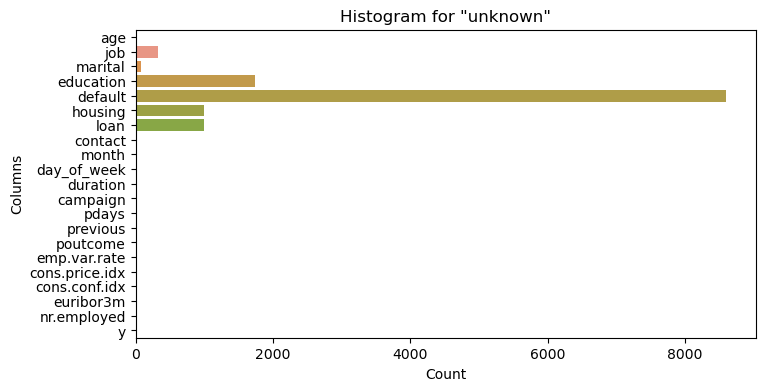

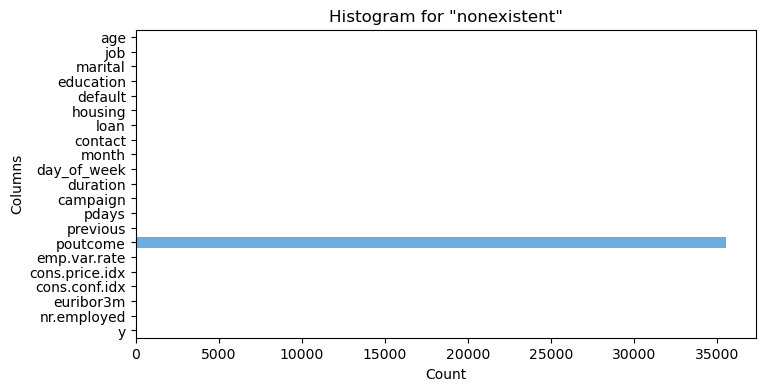

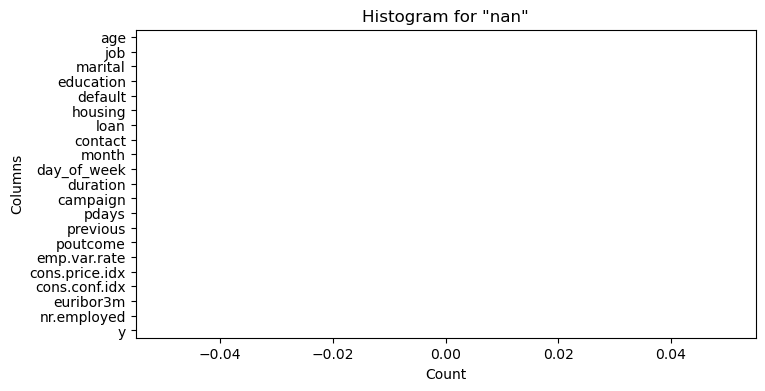

In [5]:
search_values = ['unknown', 'nonexistent', np.nan]

# Create subplots for each search value
for value in search_values:
    plt.figure(figsize=(8, 4))
    plt.title(f'Histogram for "{value}"')
    
    # Initialize a count for each column
    counts = []
    
    # Iterate through columns
    for column in df.columns:
        # Count occurrences of the value in the column
        count = df[column].apply(lambda x: x == value).sum()
        counts.append(count)
    
    # Create a bar plot for the counts
    sns.barplot(x=counts, y=df.columns)
    plt.xlabel('Count')
    plt.ylabel('Columns')

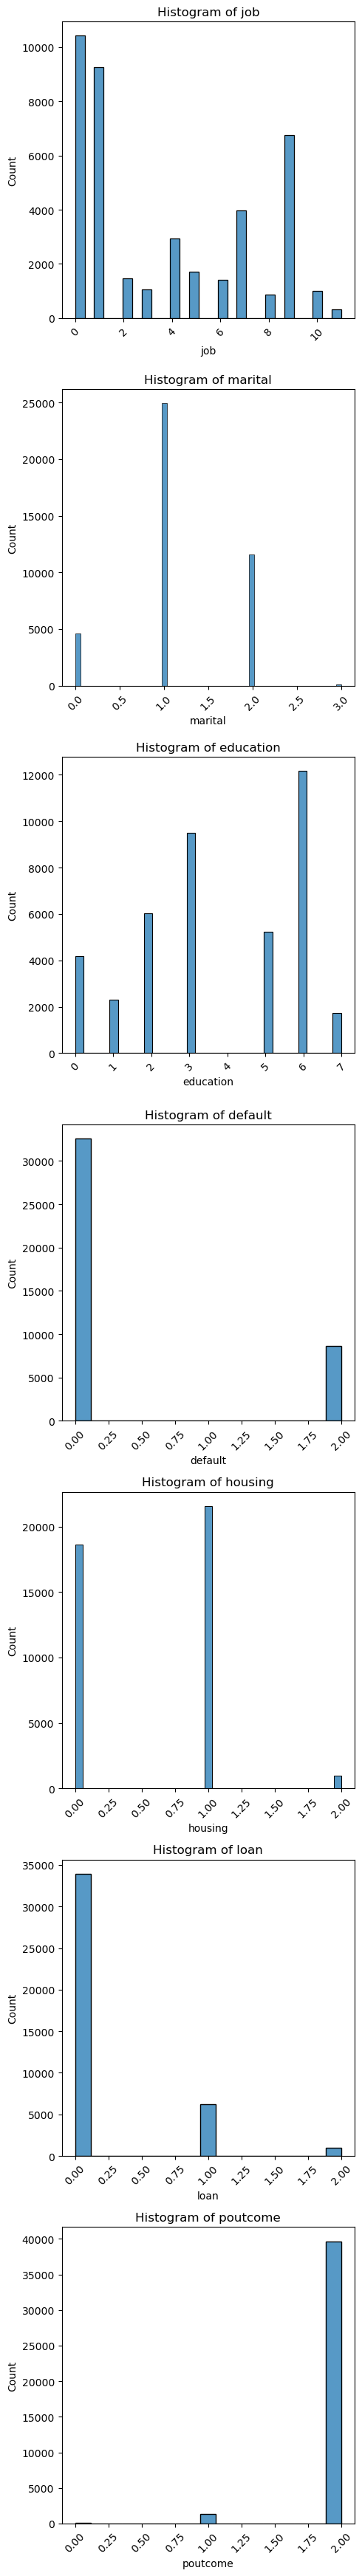

In [21]:
# Define the columns you want to plot
columns_to_plot = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(5, 5 * len(columns_to_plot)))

# Loop through the columns and create histograms
for i, column in enumerate(columns_to_plot):
    sns.histplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

    # Rotate the x-axis labels
    axes[i].tick_params(axis='x', labelrotation=45)  # You can adjust the rotation angle as needed

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
value_counts_desc = df.stack().value_counts().sort_values(ascending=False)
value_counts_desc.head(10)

no             121708
999             39675
0               35582
nonexistent     35563
yes             32467
cellular        26144
married         24928
1               22250
1.4             16247
5228.1          16234
dtype: int64

In [9]:
condition = (df['pdays'] == 999) & (df['poutcome'] == 'failure')

df.loc[condition, 'poutcome'] = 'nonexistent'

In [10]:
df['poutcome'].value_counts()

nonexistent    39673
success         1373
failure          142
Name: poutcome, dtype: int64

In [11]:
df.replace('unknown', np.nan, inplace=True)
df.replace('nonexistent', np.nan, inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no


In [12]:
df.isna().sum().sum()

52391

In [26]:
from sklearn.preprocessing import LabelEncoder

# Specify the columns you want to label encode
columns_to_encode = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

label_encoder = LabelEncoder()

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [27]:
def random_forest_impute(df, columns_to_impute):
    df_subset = df[columns_to_impute]
    rf_estimator = ExtraTreesRegressor(n_estimators=10, random_state=0)
    rf_imputer = IterativeImputer(estimator=rf_estimator, random_state=0)
    df_imputed = pd.DataFrame(rf_imputer.fit_transform(df_subset), columns=columns_to_impute)
    df[columns_to_impute] = df_imputed
    return df

def knn_impute(df, columns_to_impute):
    df_subset = df[columns_to_impute]
    knn_imputer = KNNImputer(n_neighbors=5)
    df_imputed = pd.DataFrame(knn_imputer.fit_transform(df_subset), columns=columns_to_impute)
    df[columns_to_impute] = df_imputed
    return df

def mode_impute(df, columns_to_impute):
    for col in columns_to_impute:
        mode = df[col].mode()[0]
        df[col].fillna(mode, inplace=True)
    return df

In [28]:
# Assuming you have your DataFrame 'df' and a list of columns to impute 'columns_to_impute'
columns_to_impute = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

# Make a copy of the original DataFrame to preserve the original data
df_rf = df.copy()
df_knn = df.copy()
df_mode = df.copy()

# Apply the imputers to different DataFrame copies
df_rf = random_forest_impute(df_rf, columns_to_impute)
df_knn = knn_impute(df_knn, columns_to_impute)
df_mode = mode_impute(df_mode, columns_to_impute)

In [16]:
X_rf = df_rf.drop(['y', 'duration', 'contact', 'month', 'day_of_week'], axis=1)
y_rf = df_rf['y']

X_knn = df_knn.drop(['y', 'duration', 'contact', 'month', 'day_of_week'], axis=1)
y_knn = df_knn['y']

X_mode = df_mode.drop(['y', 'duration', 'contact', 'month', 'day_of_week'], axis=1)
y_mode = df_mode['y']


X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)
X_train_mode, X_test_mode, y_train_mode, y_test_mode = train_test_split(X_mode, y_mode, test_size=0.2, random_state=42)

# Gaussian Naive Bayes
nb_model = GaussianNB()

# Fit and evaluate on the random forest imputed dataframe
nb_model.fit(X_train_rf, y_train_rf)
nb_accuracy_rf = nb_model.score(X_test_rf, y_test_rf)
print(f'Gaussian Naive Bayes Accuracy on the random forest imputed test set: {nb_accuracy_rf * 100:.2f}%')

# Fit and evaluate on the KNN imputed dataframe
nb_model.fit(X_train_knn, y_train_knn)
nb_accuracy_knn = nb_model.score(X_test_knn, y_test_knn)
print(f'Gaussian Naive Bayes Accuracy on the KNN imputed test set: {nb_accuracy_knn * 100:.2f}%')

# Fit and evaluate on the mode imputed dataframe
nb_model.fit(X_train_mode, y_train_mode)
nb_accuracy_mode = nb_model.score(X_test_mode, y_test_mode)
print(f'Gaussian Naive Bayes Accuracy on the mode imputed test set: {nb_accuracy_mode * 100:.2f}%')

# Support Vector Machine (SVM)
svm_model = SVC()

# Fit and evaluate on the random forest imputed dataframe
svm_model.fit(X_train_rf, y_train_rf)
svm_accuracy_rf = svm_model.score(X_test_rf, y_test_rf)
print(f'SVM Accuracy on the random forest imputed test set: {svm_accuracy_rf * 100:.2f}%')

# Fit and evaluate on the KNN imputed dataframe
svm_model.fit(X_train_knn, y_train_knn)
svm_accuracy_knn = svm_model.score(X_test_knn, y_test_knn)
print(f'SVM Accuracy on the KNN imputed test set: {svm_accuracy_knn * 100:.2f}%')

# Fit and evaluate on the mode imputed dataframe
svm_model.fit(X_train_mode, y_train_mode)
svm_accuracy_mode = svm_model.score(X_test_mode, y_test_mode)
print(f'SVM Accuracy on the mode imputed test set: {svm_accuracy_mode * 100:.2f}%')

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit and evaluate on the random forest imputed dataframe
rf_model.fit(X_train_rf, y_train_rf)
rf_accuracy_rf = rf_model.score(X_test_rf, y_test_rf)
print(f'Random Forest Accuracy on the random forest imputed test set: {rf_accuracy_rf * 100:.2f}%')

# Fit and evaluate on the KNN imputed dataframe
rf_model.fit(X_train_knn, y_train_knn)
rf_accuracy_knn = rf_model.score(X_test_knn, y_test_knn)
print(f'Random Forest Accuracy on the KNN imputed test set: {rf_accuracy_knn * 100:.2f}%')

# Fit and evaluate on the mode imputed dataframe
rf_model.fit(X_train_mode, y_train_mode)
rf_accuracy_mode = rf_model.score(X_test_mode, y_test_mode)
print(f'Random Forest Accuracy on the mode imputed test set: {rf_accuracy_mode * 100:.2f}%')

# k-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()

# Fit and evaluate on the random forest imputed dataframe
knn_model.fit(X_train_rf, y_train_rf)
knn_accuracy_rf = knn_model.score(X_test_rf, y_test_rf)
print(f'KNN Accuracy on the random forest imputed test set: {knn_accuracy_rf * 100:.2f}%')

# Fit and evaluate on the KNN imputed dataframe
knn_model.fit(X_train_knn, y_train_knn)
knn_accuracy_knn = knn_model.score(X_test_knn, y_test_knn)
print(f'KNN Accuracy on the KNN imputed test set: {knn_accuracy_knn * 100:.2f}%')

# Fit and evaluate on the mode imputed dataframe
knn_model.fit(X_train_mode, y_train_mode)
knn_accuracy_mode = knn_model.score(X_test_mode, y_test_mode)
print(f'KNN Accuracy on the mode imputed test set: {knn_accuracy_mode * 100:.2f}%')

# XGBoost
xgb_model = XGBClassifier()

# Fit and evaluate on the random forest imputed dataframe
xgb_model.fit(X_train_rf, y_train_rf)
xgb_accuracy_rf = xgb_model.score(X_test_rf, y_test_rf)
print(f'XGBoost Accuracy on the random forest imputed test set: {xgb_accuracy_rf * 100:.2f}%')

# Fit and evaluate on the KNN imputed dataframe
xgb_model.fit(X_train_knn, y_train_knn)
xgb_accuracy_knn = xgb_model.score(X_test_knn, y_test_knn)
print(f'XGBoost Accuracy on the KNN imputed test set: {xgb_accuracy_knn * 100:.2f}%')

# Fit and evaluate on the mode imputed dataframe
xgb_model.fit(X_train_mode, y_train_mode)
xgb_accuracy_mode = xgb_model.score(X_test_mode, y_test_mode)
print(f'XGBoost Accuracy on the mode imputed test set: {xgb_accuracy_mode * 100:.2f}%')

# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)

# Fit and evaluate on the random forest imputed dataframe
logreg_model.fit(X_train_rf, y_train_rf)
logreg_accuracy_rf = logreg_model.score(X_test_rf, y_test_rf)
print(f'Logistic Regression Accuracy on the random forest imputed test set: {logreg_accuracy_rf * 100:.2f}%')

# Fit and evaluate on the KNN imputed dataframe
logreg_model.fit(X_train_knn, y_train_knn)
logreg_accuracy_knn = logreg_model.score(X_test_knn, y_test_knn)
print(f'Logistic Regression Accuracy on the KNN imputed test set: {logreg_accuracy_knn * 100:.2f}%')

# Fit and evaluate on the mode imputed dataframe
logreg_model.fit(X_train_mode, y_train_mode)
logreg_accuracy_mode = logreg_model.score(X_test_mode, y_test_mode)
print(f'Logistic Regression Accuracy on the mode imputed test set: {logreg_accuracy_mode * 100:.2f}%')

Gaussian Naive Bayes Accuracy on the random forest imputed test set: 86.00%
Gaussian Naive Bayes Accuracy on the KNN imputed test set: 86.00%
Gaussian Naive Bayes Accuracy on the mode imputed test set: 86.00%
SVM Accuracy on the random forest imputed test set: 89.48%
SVM Accuracy on the KNN imputed test set: 89.48%
SVM Accuracy on the mode imputed test set: 89.48%
Random Forest Accuracy on the random forest imputed test set: 88.95%
Random Forest Accuracy on the KNN imputed test set: 88.95%
Random Forest Accuracy on the mode imputed test set: 88.95%
KNN Accuracy on the random forest imputed test set: 88.64%
KNN Accuracy on the KNN imputed test set: 88.64%
KNN Accuracy on the mode imputed test set: 88.64%
XGBoost Accuracy on the random forest imputed test set: 89.51%
XGBoost Accuracy on the KNN imputed test set: 89.51%
XGBoost Accuracy on the mode imputed test set: 89.51%
Logistic Regression Accuracy on the random forest imputed test set: 89.75%
Logistic Regression Accuracy on the KNN im

In [17]:
X_mode = df_mode.drop(['y', 'duration', 'contact', 'month', 'day_of_week'], axis=1)
y_mode = df_mode['y']

X_train_mode, X_test_mode, y_train_mode, y_test_mode = train_test_split(X_mode, y_mode, test_size=0.2, random_state=42)

# Gaussian Naive Bayes
nb_model = GaussianNB()

# Fit and evaluate on the mode imputed dataframe
nb_model.fit(X_train_mode, y_train_mode)
nb_accuracy_mode = nb_model.score(X_test_mode, y_test_mode)
print(f'Gaussian Naive Bayes Accuracy on the mode imputed test set: {nb_accuracy_mode * 100:.2f}%')

# Support Vector Machine (SVM)
svm_model = SVC()

# Fit and evaluate on the mode imputed dataframe
svm_model.fit(X_train_mode, y_train_mode)
svm_accuracy_mode = svm_model.score(X_test_mode, y_test_mode)
print(f'SVM Accuracy on the mode imputed test set: {svm_accuracy_mode * 100:.2f}%')

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit and evaluate on the mode imputed dataframe
rf_model.fit(X_train_mode, y_train_mode)
rf_accuracy_mode = rf_model.score(X_test_mode, y_test_mode)
print(f'Random Forest Accuracy on the mode imputed test set: {rf_accuracy_mode * 100:.2f}%')

# k-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()

# Fit and evaluate on the mode imputed dataframe
knn_model.fit(X_train_mode, y_train_mode)
knn_accuracy_mode = knn_model.score(X_test_mode, y_test_mode)
print(f'KNN Accuracy on the mode imputed test set: {knn_accuracy_mode * 100:.2f}%')

# XGBoost
xgb_model = XGBClassifier()

# Fit and evaluate on the mode imputed dataframe
xgb_model.fit(X_train_mode, y_train_mode)
xgb_accuracy_mode = xgb_model.score(X_test_mode, y_test_mode)
print(f'XGBoost Accuracy on the mode imputed test set: {xgb_accuracy_mode * 100:.2f}%')

# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)

# Fit and evaluate on the mode imputed dataframe
logreg_model.fit(X_train_mode, y_train_mode)
logreg_accuracy_mode = logreg_model.score(X_test_mode, y_test_mode)
print(f'Logistic Regression Accuracy on the mode imputed test set: {logreg_accuracy_mode * 100:.2f}%')

Gaussian Naive Bayes Accuracy on the mode imputed test set: 86.00%
SVM Accuracy on the mode imputed test set: 89.48%
Random Forest Accuracy on the mode imputed test set: 88.95%
KNN Accuracy on the mode imputed test set: 88.64%
XGBoost Accuracy on the mode imputed test set: 89.51%
Logistic Regression Accuracy on the mode imputed test set: 89.75%


In [31]:
# Assuming your data is stored in a DataFrame called 'df'
# Extract features (X) and target variable (y)
X = df_mode.drop(columns=['y'])
y = df_mode['y']

# Preprocess the data (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
n_components = 10  # Choose the number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-1.07252602,  1.32414211,  1.9313854 , ...,  0.54851536,
        -0.39582563, -0.23377881],
       [-1.30477362,  1.58308066,  1.93514593, ...,  0.72762306,
         0.44317873,  1.56848039],
       [-0.93508706,  0.75649381,  0.26725235, ...,  0.71427301,
         0.40082438, -0.02406549],
       ...,
       [ 1.67877342, -0.34972001,  1.16174072, ...,  1.5131338 ,
         1.48281901, -1.1720724 ],
       [ 1.68636985, -0.3476078 ,  0.67995442, ...,  2.35240816,
         2.12492855, -0.76026514],
       [ 2.29990966,  0.51707282,  1.97051804, ...,  1.56280805,
         1.7498114 , -1.35233806]])

# INPUTED DATA

Classification Report for Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7303
           1       0.40      0.44      0.42       935

    accuracy                           0.86      8238
   macro avg       0.66      0.68      0.67      8238
weighted avg       0.87      0.86      0.86      8238

Classification Report for Support Vector Machine (SVM):
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.61      0.20      0.30       935

    accuracy                           0.89      8238
   macro avg       0.76      0.59      0.62      8238
weighted avg       0.87      0.89      0.87      8238

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7303
           1       0.52      0.28      0.37       935

    accuracy                         

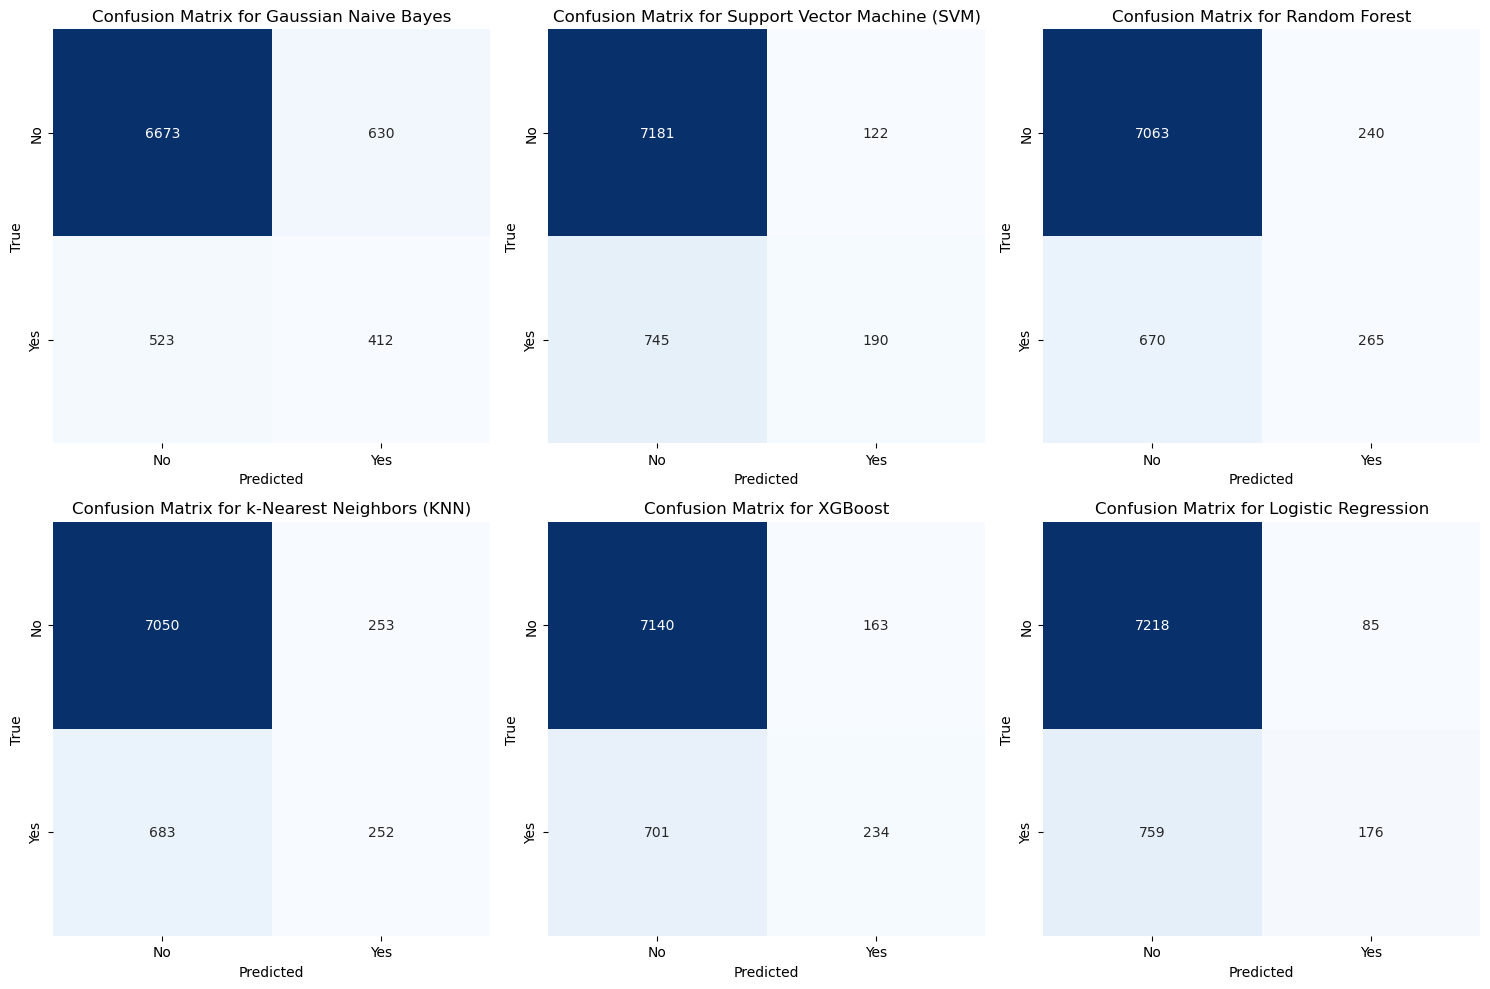

In [18]:
# Define the models
models = [
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Support Vector Machine (SVM)', SVC()),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('k-Nearest Neighbors (KNN)', KNeighborsClassifier()),
    ('XGBoost', XGBClassifier()),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
]

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Evaluate and generate classification reports and confusion matrices
for i, (model_name, model) in enumerate(models):
    # Fit and evaluate on the mode imputed dataframe
    model.fit(X_train_mode, y_train_mode)
    y_pred_mode = model.predict(X_test_mode)

    # Classification report
    report = classification_report(y_test_mode, y_pred_mode)
    print(f"Classification Report for {model_name}:\n{report}")

    # Confusion Matrix
    cm = confusion_matrix(y_test_mode, y_pred_mode)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {model_name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

Classification Report for Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7303
           1       0.56      0.37      0.45       935

    accuracy                           0.90      8238
   macro avg       0.74      0.67      0.70      8238
weighted avg       0.88      0.90      0.89      8238

Classification Report for Support Vector Machine (SVM):
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7303
           1       0.67      0.36      0.47       935

    accuracy                           0.91      8238
   macro avg       0.79      0.67      0.71      8238
weighted avg       0.89      0.91      0.89      8238

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.63      0.46      0.53       935

    accuracy                         

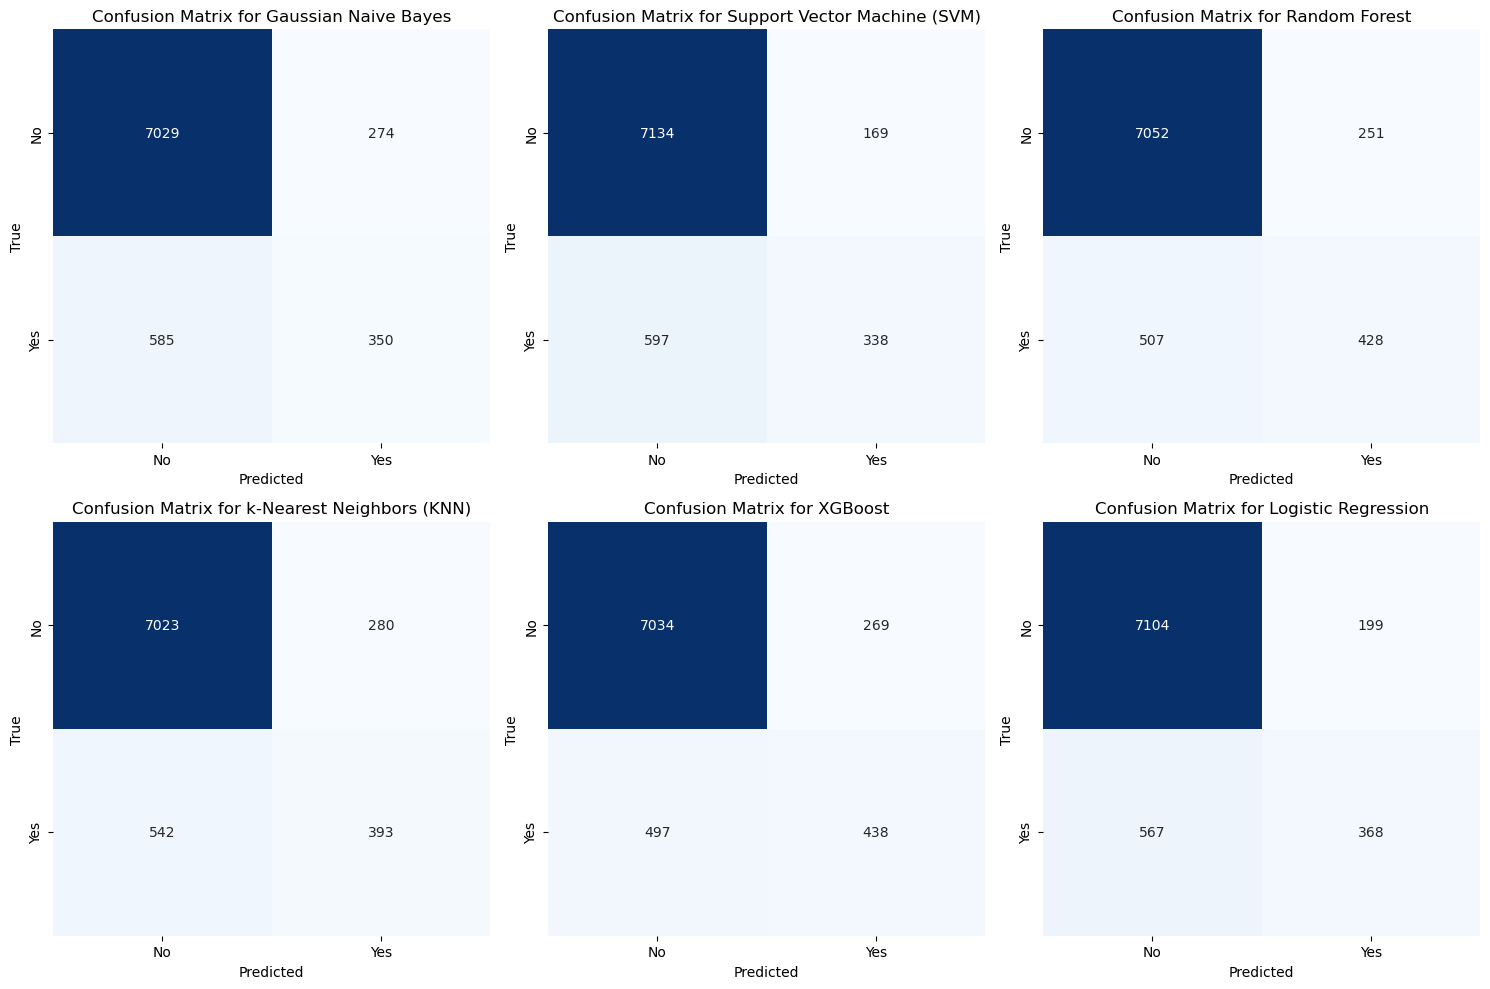

In [33]:
# Split the data into train and test sets
X_train_mode, X_test_mode, y_train_mode, y_test_mode = train_test_split(X_pca, y_mode, test_size=0.2, random_state=42)

# Define the models
models = [
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Support Vector Machine (SVM)', SVC()),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('k-Nearest Neighbors (KNN)', KNeighborsClassifier()),
    ('XGBoost', XGBClassifier()),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
]

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Evaluate and generate classification reports and confusion matrices
for i, (model_name, model) in enumerate(models):
    # Fit and evaluate on the mode imputed dataframe
    model.fit(X_train_mode, y_train_mode)
    y_pred_mode = model.predict(X_test_mode)

    # Classification report
    report = classification_report(y_test_mode, y_pred_mode)
    print(f"Classification Report for {model_name}:\n{report}")

    # Confusion Matrix
    cm = confusion_matrix(y_test_mode, y_pred_mode)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {model_name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

# READ DF AGAIN

In [94]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


      age            job  marital            education  default housing loan  \
0      24    blue-collar  married             basic.9y       no     yes   no   
1      37     management  married    university.degree       no      no   no   
2      44  self-employed   single  professional.course       no      no   no   
3      33    blue-collar   single             basic.4y       no      no   no   
4      40    blue-collar  married             basic.9y  unknown     yes  yes   
...   ...            ...      ...                  ...      ...     ...  ...   
9275   60        retired  married          high.school       no      no   no   
9276   27         admin.   single  professional.course       no      no   no   
9277   36         admin.   single    university.degree       no     yes   no   
9278   57      housemaid  married             basic.4y       no      no   no   
9279   34     technician   single    university.degree       no     yes  yes   

        contact month day_of_week  ... 

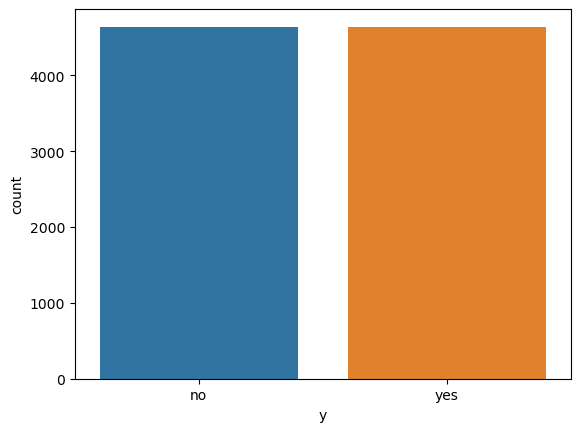

In [95]:
dicionario = {i: df[df['y'] == i].sample(df['y'].value_counts().min(), random_state=42) for i in df['y'].unique()}

# Concatenate the samples to create the new DataFrame
df2 = pd.concat([dicionario[i] for i in df['y'].unique()], ignore_index=True, sort=False)

# Display the new DataFrame
print(df2)

# Visualize the countplot
sns.countplot(x='y', data=df2)
plt.show()

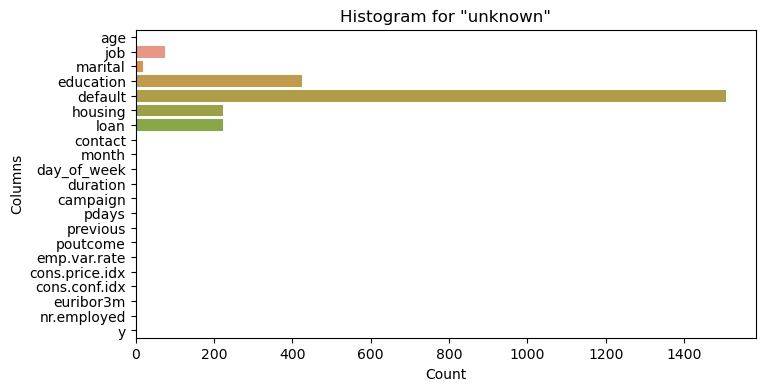

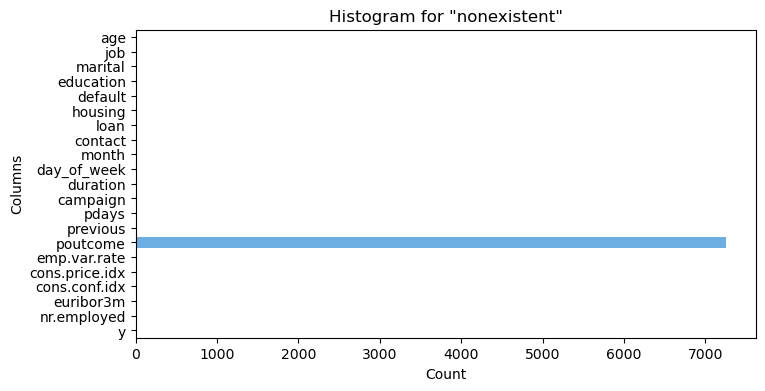

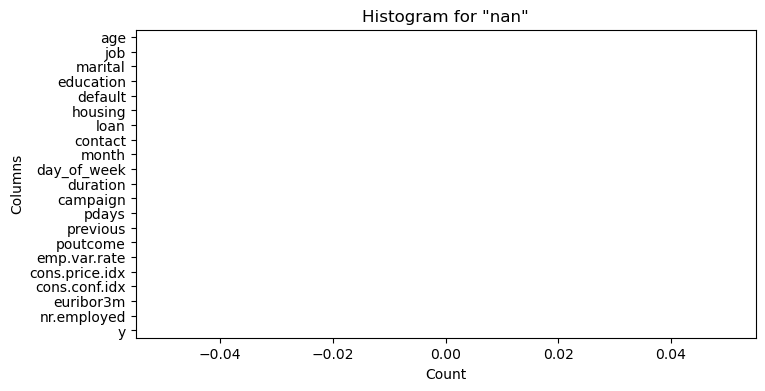

In [96]:
search_values = ['unknown', 'nonexistent', np.nan]

# Create subplots for each search value
for value in search_values:
    plt.figure(figsize=(8, 4))
    plt.title(f'Histogram for "{value}"')
    
    # Initialize a count for each column
    counts = []
    
    # Iterate through columns
    for column in df2.columns:  # Change df to df2 here
        # Count occurrences of the value in the column
        count = df2[column].apply(lambda x: x == value).sum()  # Change df to df2 here
        counts.append(count)
    
    # Create a bar plot for the counts
    sns.barplot(x=counts, y=df2.columns)  # Change df to df2 here
    plt.xlabel('Count')
    plt.ylabel('Columns')

plt.show()

In [97]:
# Assuming you have already undersampled the DataFrame and it's named df2

# Display the top 10 values in the DataFrame
value_counts_desc = df2.stack().value_counts().sort_values(ascending=False)
print(value_counts_desc.head(10))

# Update values in the 'poutcome' column based on the specified condition
condition = (df2['pdays'] == 999) & (df2['poutcome'] == 'failure')
df2.loc[condition, 'poutcome'] = 'nonexistent'
print(df2['poutcome'].value_counts())

# Replace 'unknown' and 'nonexistent' with NaN
df2.replace('unknown', np.nan, inplace=True)
df2.replace('nonexistent', np.nan, inplace=True)

# Display the first few rows of the DataFrame
print(df2.head())

# Check the total number of missing values in the DataFrame
print(df2.isna().sum().sum())

# Label encode specified columns
columns_to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'y']

label_encoder = LabelEncoder()

for column in columns_to_encode:
    df2[column] = label_encoder.fit_transform(df2[column])

no                   24223
yes                  10942
999                   8246
0                     7265
nonexistent           7255
cellular              6681
1                     5670
married               5411
university.degree     3035
2                     2864
dtype: int64
nonexistent    8245
success         952
failure          83
Name: poutcome, dtype: int64
   age            job  marital            education default housing loan  \
0   24    blue-collar  married             basic.9y      no     yes   no   
1   37     management  married    university.degree      no      no   no   
2   44  self-employed   single  professional.course      no      no   no   
3   33    blue-collar   single             basic.4y      no      no   no   
4   40    blue-collar  married             basic.9y     NaN     yes  yes   

     contact month day_of_week  ...  campaign  pdays  previous  poutcome  \
0  telephone   may         mon  ...         2    999         0       NaN   
1  telephone   may 

In [98]:
def mode_impute(df2, columns_to_impute):
    for col in columns_to_impute:
        mode = df2[col].mode()[0]
        df2[col].fillna(mode, inplace=True)
    return df2

In [99]:
# Assuming you have your DataFrame 'df' and a list of columns to impute 'columns_to_impute'
columns_to_impute = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

# Make a copy of the original DataFrame to preserve the original data
df_mode = df2.copy()

# Apply the imputers to different DataFrame copies
df_mode = mode_impute(df_mode, columns_to_impute)

# UNDERSAMPLED MODEL

Classification Report for Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       914
           1       0.80      0.60      0.68       942

    accuracy                           0.72      1856
   macro avg       0.74      0.72      0.72      1856
weighted avg       0.74      0.72      0.72      1856

Classification Report for Support Vector Machine (SVM):
              precision    recall  f1-score   support

           0       0.70      0.73      0.72       914
           1       0.73      0.70      0.71       942

    accuracy                           0.71      1856
   macro avg       0.72      0.72      0.71      1856
weighted avg       0.72      0.71      0.71      1856

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.69      0.78      0.73       914
           1       0.76      0.66      0.70       942

    accuracy                         

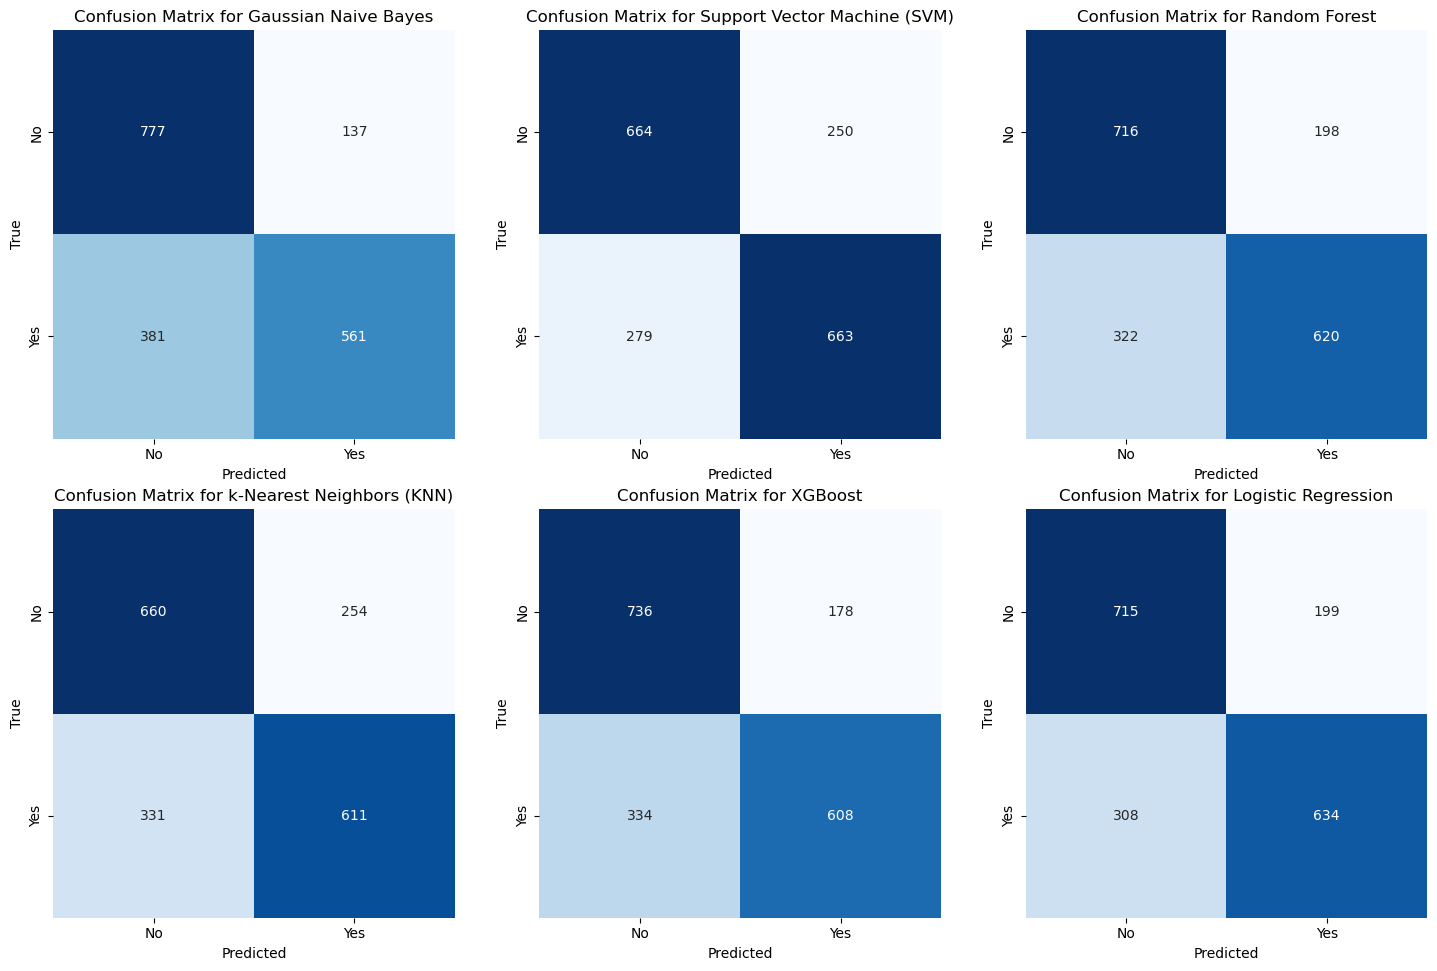

In [102]:
X_mode = df_mode.drop(['y', 'duration', 'contact', 'month', 'day_of_week'], axis=1)
y_mode = df_mode['y']

X_train_mode, X_test_mode, y_train_mode, y_test_mode = train_test_split(X_mode, y_mode, test_size=0.2, random_state=42)

# Define the models
models = [
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Support Vector Machine (SVM)', SVC()),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('k-Nearest Neighbors (KNN)', KNeighborsClassifier()),
    ('XGBoost', XGBClassifier()),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
]

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.tight_layout(pad=3.0)

# Evaluate and generate classification reports and confusion matrices
for (model_name, model), ax in zip(models, axes.flatten()):
    # Fit and evaluate on the mode imputed dataframe
    model.fit(X_train_mode, y_train_mode)
    y_pred_mode = model.predict(X_test_mode)

    # Classification report
    report = classification_report(y_test_mode, y_pred_mode)
    print(f"Classification Report for {model_name}:\n{report}")

    # Confusion Matrix
    cm = confusion_matrix(y_test_mode, y_pred_mode)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=ax)
    ax.set_title(f'Confusion Matrix for {model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.show()